In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Example dataset
x = [1, 2, 4, 3, 5]
y = [1, 3, 3, 2, 5]
d = {'x':x, 'y':y}
d

{'x': [1, 2, 4, 3, 5], 'y': [1, 3, 3, 2, 5]}

In [25]:
# Create Dataframe from dataset
df = pd.DataFrame(d)
df

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


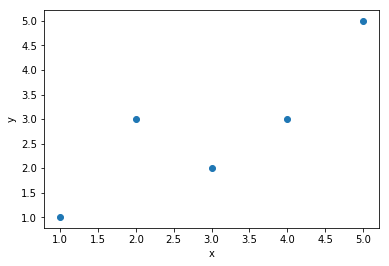

In [14]:
# Plot datapoints
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# Calculate mean
def calculate_mean(list):
    return sum(list)/len(list)

In [16]:
# Estimating the slope (b1)

In [26]:
df['mean(x)'] = calculate_mean(df['x'])
df['mean(y)'] = calculate_mean(df['y'])

In [27]:
df['x - mean(x)'] = df['x'] - df['mean(x)']
df['y - mean(y)'] = df['y'] - df['mean(y)']

In [28]:
# Construct numerator items
df['products_xy'] = df['x - mean(x)'] * df['y - mean(y)']

In [29]:
# Construct denominator items
df['squares_x'] = df['x - mean(x)'] * df['x - mean(x)']

In [30]:
df

,x,y,mean(x),mean(y),x - mean(x),y - mean(y),products_xy,squares_x
0,1,1,3.0,2.8,-2.0,-1.8,3.6,4.0
1,2,3,3.0,2.8,-1.0,0.2,-0.2,1.0
2,4,3,3.0,2.8,1.0,0.2,0.2,1.0
3,3,2,3.0,2.8,0.0,-0.8,-0.0,0.0
4,5,5,3.0,2.8,2.0,2.2,4.4,4.0


In [31]:
# Sum columns
print(df['products_xy'].sum())
print(df['squares_x'].sum())

8.0
10.0


In [32]:
b1 = df['products_xy'].sum() / df['squares_x'].sum()
b1

0.8

In [ ]:
# Estimating the intercept (b0)

In [33]:
x_mean = calculate_mean(df['x'])
y_mean = calculate_mean(df['y'])

In [36]:
b0 = y_mean - b1 * x_mean
b0

0.39999999999999947

In [37]:
# Making predictions
df['predicted_y'] = b0 + b1 * df['x']

In [38]:
df

,x,y,mean(x),mean(y),x - mean(x),y - mean(y),products_xy,squares_x,predicted_y
0,1,1,3.0,2.8,-2.0,-1.8,3.6,4.0,1.2
1,2,3,3.0,2.8,-1.0,0.2,-0.2,1.0,2.0
2,4,3,3.0,2.8,1.0,0.2,0.2,1.0,3.6
3,3,2,3.0,2.8,0.0,-0.8,-0.0,0.0,2.8
4,5,5,3.0,2.8,2.0,2.2,4.4,4.0,4.4


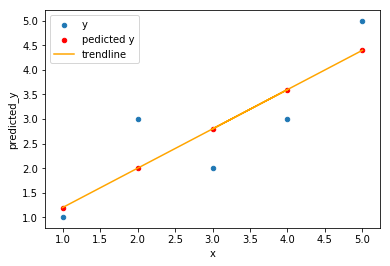

In [44]:
ax = df.plot(kind='scatter', x='x', y='y', label='y')
df.plot(x='x', y='predicted_y', label='pedicted y', ax=ax, color='r', kind='scatter')
df.plot(x='x', y='predicted_y', label='trendline', ax=ax, color='orange')
plt.show()